# 61 编码器-解码器

机器翻译是序列转换模型的一个核心问题，其输入和输出都是长度可变的序列。</br>
为了处理这种类型的输入和输出， 我们可以设计一个包含两个主要组件的架构：</br>
第一个组件是一个编码器（encoder）：它接受一个长度可变的序列作为输入， 并将其转换为具有固定形状的编码状态。 </br>
第二个组件是解码器（decoder）：它将固定形状的编码状态映射到长度可变的序列。</br>
这被称为编码器-解码器（encoder-decoder）架构</br>
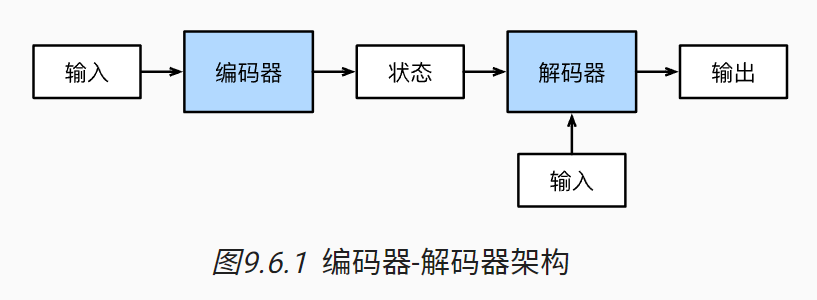

## 编码器
在编码器接口中，我们只指定长度可变的序列作为编码器的输入X。任何继承这个Encoder基类的模型将完成代码实现。

In [1]:
from torch import nn


class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

## 解码器
在下面的解码器接口中，我们新增一个init_state函数，用于将编码器的输出（enc_outputs）转换为编码后的状态。</br>
注意，此步骤可能需要额外的输入，例如：输入序列的有效长度。</br>
为了逐个地生成长度可变的词元序列，解码器在每个时间步都会将输入 （例如：在前一时间步生成的词元）和编码后的状态 映射成当前时间步的输出词元。

In [2]:
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

## 合并编码器和解码器
总而言之，“编码器-解码器”架构包含了一个编码器和一个解码器 并且还拥有可选的额外的参数。在前向传播中，编码器的输出用于生成编码状态，这个状态又被解码器作为其输入的一部分。

In [3]:
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

#### “编码器－解码器”架构可以将长度可变的序列作为输入和输出，因此适用于机器翻译等序列转换问题。

#### 编码器将长度可变的序列作为输入，并将其转换为具有固定形状的编码状态。

#### 解码器将具有固定形状的编码状态映射为长度可变的序列。